<a href="https://colab.research.google.com/github/SandyLlapa/ML-PCA-Class-Kfold/blob/main/SandyLlapa_Lab_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lab 6

## Introduction

**What is the goal of this lab?**

The goal of this lab is to get practice with:
 - Principle Component Analysis (PCA) for data preprocessing before ML
 - Classification evaluation metrics for comparing and evaluting classification models
 - K-fold Cross Validation for validating ML models will work on new data


**Context**


Understanding key concepts like Principal Component Analysis (PCA), classification evaluation metrics, and K-fold cross-validation is essential for effective machine learning. PCA helps in reducing dimensionality, simplifying models, and enhancing performance, particularly with high-dimensional data. Classification evaluation metrics, such as accuracy, precision, recall, and F1-score, are crucial for assessing and comparing model performance, especially in the context of imbalanced datasets. K-fold cross-validation ensures that a model generalizes well to new data by providing a robust estimate of its performance through repeated training and testing on different subsets of the data.




### Data

This lab uses the Breast Cancer Wisconsin (Original) data set 🔬. The goal with this data is to predict whether a tumor is benign or malignant based on various features derived from cell nuclei in breast cancer biopsies.

In [ ]:
# Install package to download data sets from UCI ML Repo
!pip3 install -U ucimlrepo --quiet
from ucimlrepo import fetch_ucirepo

In [ ]:
# Get the data set
cancer = fetch_ucirepo(name="Breast Cancer Wisconsin (Original)")

In [ ]:
# Get raw data in a pandas.DataFrame format
cancer_df = cancer.data.original

In [ ]:
# Citation
print("Citation:\n", cancer.metadata.additional_info.citation)

Citation:
 This breast cancer databases was obtained from the University of Wisconsin Hospitals, Madison from Dr. William H. Wolberg.  If you publish results when using this database, then please include this information in your acknowledgements.  Also, please cite one or more of:
1. O. L. Mangasarian and W. H. Wolberg: "Cancer diagnosis via linear programming", SIAM News, Volume 23, Number 5, September 1990, pp 1 & 18.
2. William H. Wolberg and O.L. Mangasarian: "Multisurface method of pattern separation for medical diagnosis applied to breast cytology", Proceedings of the National Academy of Sciences, U.S.A., Volume 87, December 1990, pp 9193-9196.
3. O. L. Mangasarian, R. Setiono, and W.H. Wolberg: "Pattern recognition via linear programming: Theory and application to medical diagnosis", in: "Large-scale numerical optimization", Thomas F. Coleman and Yuying Li, editors, SIAM Publications, Philadelphia 1990, pp 22-30.
4. K. P. Bennett & O. L. Mangasarian: "Robust linear programming d

> _Wolberg,WIlliam. (1992). Breast Cancer Wisconsin (Original)._      
> _UCI Machine Learning Repository. https://doi.org/10.24432/C5HP4Z._


In [ ]:
# More information
print("Check out this data set on the UCI ML Repository for more information:")
print(cancer.metadata.repository_url)

Check out this data set on the UCI ML Repository for more information:
https://archive.ics.uci.edu/dataset/15/breast+cancer+wisconsin+original


## Problem Statement

**Describe the real-world problem being solved with the model we will build with this data set. Describe in detail the main value of having this machine learning model and who would benefit from this model? Also, how accuracte would this model need to be for it to be useful?**

>
The real-world problem being solved with the model is detecting breast cancer and whether its benign and malignant. The key value of having this machine learning model is to have accurate and fast classification of tumors. Not only does this model benefit docotrs in making a diagnosis but also help patients get fast results. A model like this would need to be at least 90-95% accuracy to ensure patient are given the correct treatment based on the results.  

**Provide a detailed explanation of the following performance metrics used in evaluating classification models: accuracy, precision, recall, F1-score, and AUC score.**

**For each metric, describe how it is calculated, what it measures, and the trade-offs associated with using it in the context of imbalanced datasets. In your answer, include examples of situations where each metric would be more or less useful, emphasizing how they relate to each other.**


Accuracy in classification models is the ratio of the number of correct predictions to the total number of instances. It can be calculated as: (true positives + true negatives)/total instances. If the model only receives benign data, it will only be accurate in predicting benign cases and not malignant ones. This would make the model inaccurate in predicting both benign and malignant cases. Accuracy is useful when the dataset is balanced, but it is less useful when the dataset is imbalanced. In an imbalanced dataset, the accuracy of the model may not be helpful because it can be misleading.

Precision is the proportion of positive predictions that are actually correct. It can be calculated as: (true postives) / (true postives + false postives) . A model with high precision indicates that it can predict positive cases correctly. However, precision does not tell us how many actual positive cases were missed. Precision is useful when true positives are important, but it is less useful when false negatives are critical, as in medical diagnoses where missing a malignant case is dangerous.


Recall is the proportion of actual positive cases that were correctly predicted. It can be calculated as: (true postives) / (true postives + false negatives). A model with high recall is able to identify most actual positives (malignant cases), but this may also lead to more false positives. Recall is useful when minimizing false negatives is critical, but it is less useful when false positives are more problematic.



The F1-score combines precision and recall to measure a model's overall predictive performance. It is calculated as: (2 x Precision x Recall) / (Precision + Recall). In imbalanced datasets, the F1-score is useful for balancing precision and recall. It is particularly helpful when there needs to be a balance between the two metrics. However, the F1-score is less useful when either precision or recall is more important than the other.


The AUC score represents the area under the ROC curve, which plots recall against the false positive rate. The AUC score tells us how well the classifier can distinguish between positive and negative classes. In imbalanced datasets, AUC may overestimate the model’s performance because it may not capture the false positive rate as quickly. AUC is useful when you want to measure the model’s performance across multiple thresholds, but it is less useful when there is a significant class imbalance.

## Exploratory Data Analysis

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Data Inspection

Print out the following details about the data:
- The first 5 rows of the data set
- Number of rows and columns
- Data type of each column
- Number of null values (or not-null values) in each column
- General statistics of each numeric column (min, max, mean, standard deviation)

---

**Hints**

- [`pandas.DataFrame.head()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.head.html)
- [`pandas.DataFrame.info()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.info.html)
- [`pandas.DataFrame.describe()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.describe.html)

In [ ]:

fiveRows = cancer_df.head()

rowsCols = cancer_df.shape

dataTypes = cancer_df.dtypes

nullValues = cancer_df.isnull().sum()

stats = cancer_df.describe()

print(f"The first 5 rows of the data set: {fiveRows}\n")
print(f"Number of rows and columns: {rowsCols}\n")
print(f"Data Types: {dataTypes}\n")
print(f"Number of null values : {nullValues}\n")
print(f"General Stats: {stats}\n")

The first 5 rows of the data set:    Sample_code_number  Clump_thickness  Uniformity_of_cell_size  \
0             1000025                5                        1   
1             1002945                5                        4   
2             1015425                3                        1   
3             1016277                6                        8   
4             1017023                4                        1   

   Uniformity_of_cell_shape  Marginal_adhesion  Single_epithelial_cell_size  \
0                         1                  1                            2   
1                         4                  5                            7   
2                         1                  1                            2   
3                         8                  1                            3   
4                         1                  3                            2   

   Bare_nuclei  Bland_chromatin  Normal_nucleoli  Mitoses  Class  
0          1.0       

### Data cleaning

The column `'Sample_code_number'` is not needed. Drop that column from the DataFrame.

---
**Hints**

- [`pandas.DataFrame.drop()`](https://pandas.pydata.org/pandas-docs/version/2.0/reference/api/pandas.DataFrame.drop.html)

In [ ]:

cancer_df = cancer_df.drop(columns=['Sample_code_number'])
# stats = cancer_df.describe()
# print(f"General Stats: {stats}\n")

The `'Class'` column of the DataFrame represents the target variable that we want to predict. In the raw data the value `2` = benign and `4` = malignant. For our binary classification we want benign=0 and malignant=1.

In the `'Class'` column replace all the `2` values with `0` and all th `4` values with `1`.

---
**Hints**

- [`pandas.Series.map()`](https://pandas.pydata.org/docs/reference/api/pandas.Series.map.html)

In [ ]:

cancer_df['Class'] = cancer_df['Class'].map({2:0,4:1})
# stats = cancer_df.describe()
# print(f"General Stats: {stats}\n")

The `'Bare_nuclei'` column was the only numeric column that was read as a float type instead of an interger type. This is due to it having some missing values. _The Numpy representation of a missing number `np.nan` is a float type. You can verify this with `isinstance(np.nan, float)`_.

Because there are not very many null values in that column, let's drop the rows with the null values. Then convert the `'Bare_nuclei'` column to be an interger type to be consistent with the rest of the features.

---
**Hints**

_Dropping NA rows_
- [`pandas.DataFrame.dropna()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.dropna.html)

_Convert column data type_
- [`pandas.Series.astype()`](https://pandas.pydata.org/docs/reference/api/pandas.Series.astype.html)


In [ ]:

cancer_df = cancer_df.dropna(subset=['Bare_nuclei'])

cancer_df['Bare_nuclei'] = cancer_df['Bare_nuclei'].astype(int)


### Data Visualization and Statistics

Split the full training data set into training and testing sets. Then separate the feature variables from the target variable `'Class'` that we are trying to predict.

Use the following standard naming conventions for those sections of your data:
- `train_df` - subset of data for model training
- `test_df` - subset of data held out for model evaluation on "new" data
- `X_train` - the features (independent variables) of the training data
- `X_test` - the features (independent variables) of the testing data
- `y_train` - the target (dependent variable) of the training data
- `y_test` - the target (dependent variable) of the testing data

---
**Hints**
- [`sklearn.model_selection.train_test_split()`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)


In [ ]:
from sklearn.model_selection import train_test_split

X= cancer_df.drop(columns=['Class'])
y = cancer_df['Class']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=4601)

train_df = pd.concat([X_train,y_train] , axis=1)
test_df = pd.concat([X_test,y_test] , axis=1)



Plot the distribution of each numeric feature variable for each class (benign or malignant), and a scatter plot between each pair of numeric variables.

---
**Hints**
- [`seaborn.pairplot()`](https://seaborn.pydata.org/generated/seaborn.pairplot.html)
    - Set the argument `hue="Class"`

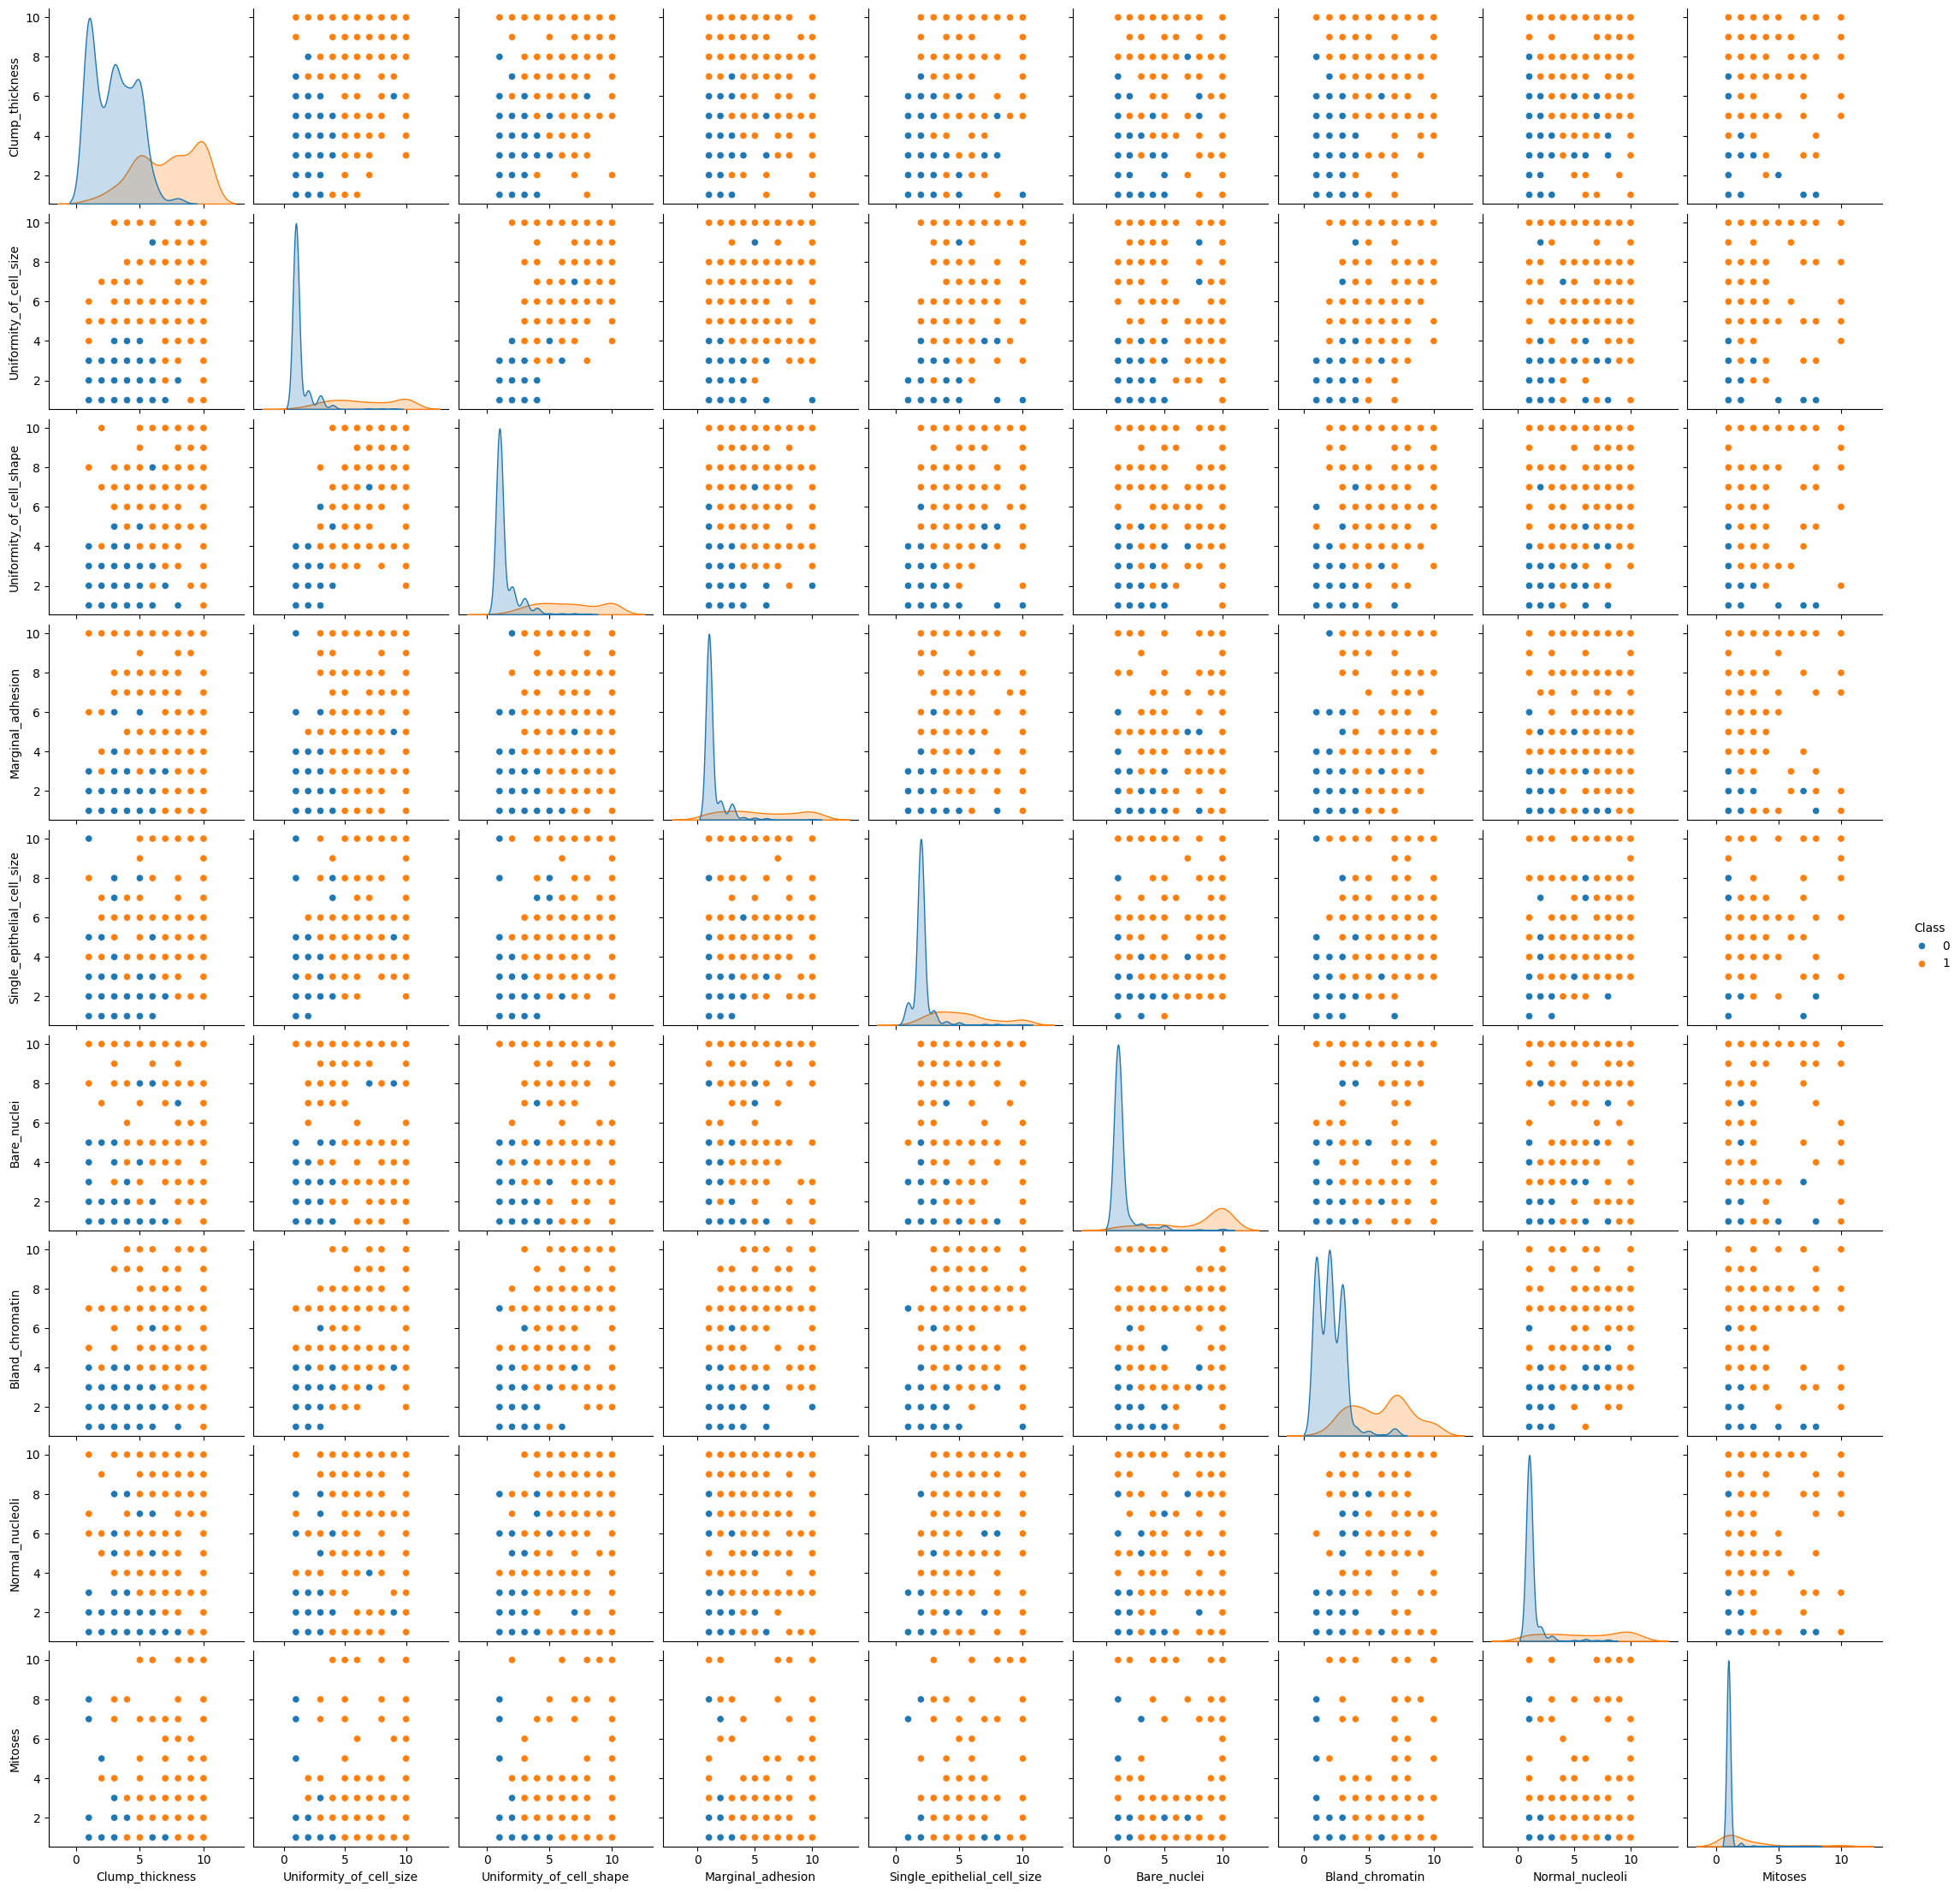

In [ ]:

sns.pairplot(cancer_df, hue="Class")
plt.show()

Perform and ANOVA test for each of the feature variables with the categorical `'Class'` variable (similar to Lab 3). Pick the features with the highest 3 F-statistics and save them into a separate data frame.

---
**Hints**

_From Lab 3_
- [`statsmodles.formula.api.ols()`](https://www.statsmodels.org/stable/generated/statsmodels.formula.api.ols.html#statsmodels.formula.api.ols)
- [`statsmodels.api.stats.anova_lm()`](https://www.statsmodels.org/stable/generated/statsmodels.stats.anova.anova_lm.html)

_Other possible methods_

- [`scipy.stats.f_oneway()`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.f_oneway.html)
- [`sklearn.feature_selection.f_classif()`](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.f_classif.html)



In [ ]:
from sklearn.feature_selection import f_classif

fStat, pValue = f_classif(X_train,y_train)

results = pd.DataFrame({
    'Feature': X_train.columns,
    'F-stats': fStat,
    'p-value': pValue
})

highFstat = results.sort_values(by='F-stats',ascending=False).head(3)
topThree = X_train[highFstat['Feature']]

highFstat.head()
topThree.head()


,Uniformity_of_cell_size,Uniformity_of_cell_shape,Bare_nuclei
377,1,1,1
690,1,1,1
583,1,1,1
305,8,4,10
558,1,1,1


Perform a Principal Component Analysis (PCA) on the _training data_, keeping the first 3 principal components. Create a new DataFrame that includes these principal components and the original `'Class'` variable. Then, generate a seaborn pairplot to visualize the relationship between the principal components, with the `'Class'` variable as the hue.

---

**Hints**

- [`sklearn.decomposition.PCA`](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html)
- [`sns.pairplot()`](https://seaborn.pydata.org/generated/seaborn.pairplot.html)
    - Set the argument `hue="Class"`



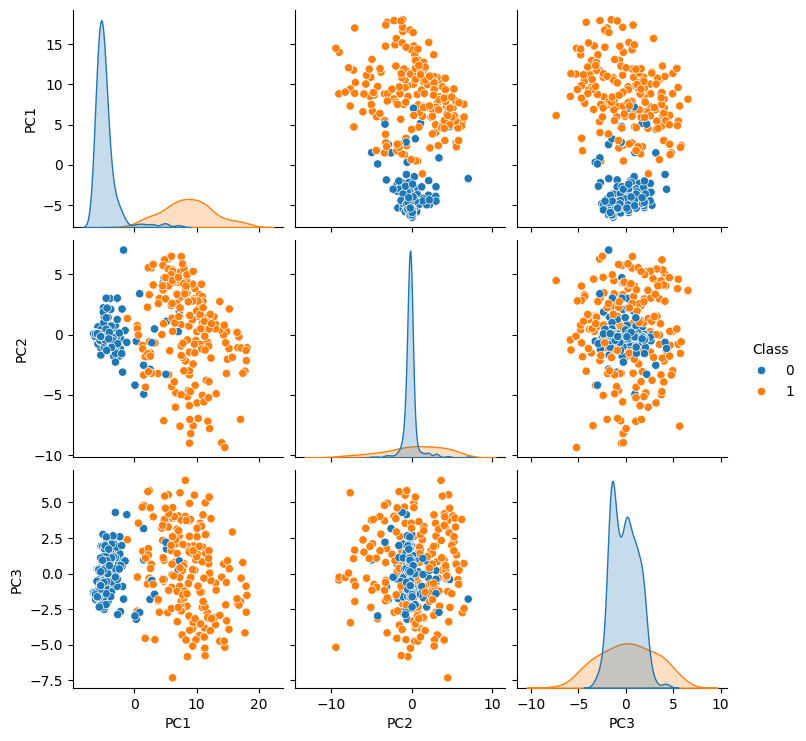

In [ ]:

from sklearn.decomposition import PCA
pca = PCA(n_components=3)
X_train_pca = pca.fit_transform(X_train)


pca_df= pd.DataFrame(data=X_train_pca, columns=['PC1', 'PC2', 'PC3'])
pca_df['Class'] = y_train.values

sns.pairplot(pca_df, hue='Class')
plt.show()

## Models

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC

Evaluate the performance of three classifiers: K-Nearest Neighbors (K-NN), Multi-Layer Perceptron (MLP), and Support Vector Classifier (SVC) on both the data sets. First with top 3 features selected through ANOVA, and second with the 3 principal components obtained from PCA. Perform 10-fold cross-validation on both feature sets and print out the average F1 scores of each classifier.

---

**Hints**

- [`sklearn.model_selection.cross_val_score()`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html)
- [`sklearn.neighbors.KNeighborsClassifier`](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html)
- [`sklearn.neural_network.MLPClassifier`](https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html)
- [`sklearn.svm.SVC`](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_val_score

knn = KNeighborsClassifier()
svc = SVC()
mlp = MLPClassifier(max_iter=1000)

scoreKNN = cross_val_score(knn, topThree, y_train,cv=10).mean()
scoreSVC = cross_val_score(svc, topThree, y_train,cv=10).mean()
scoreMLP = cross_val_score(mlp, topThree, y_train,cv=10).mean()

print(f"K-NN ANOVA SCORE: {scoreKNN}\n")
print(f"SVC ANOVA SCORE: {scoreSVC}\n")
print(f"MLP ANOVA SCORE: {scoreMLP}\n")

XPCA = pca_df.drop(columns=['Class'])
YPCA = pca_df['Class']

knnPCA = cross_val_score(knn,XPCA, YPCA,cv=10).mean()
svcPCA =cross_val_score(svc,XPCA, YPCA,cv=10).mean()
mlpPCA = cross_val_score(mlp,XPCA, YPCA,cv=10).mean()

print(f"K-NN PCA SCORE: {knnPCA}\n")
print(f"SVC PCA SCORE: {svcPCA}\n")
print(f"MLP PCA SCORE: {mlpPCA}\n")




K-NN ANOVA SCORE: 0.9579124579124578

SVC ANOVA SCORE: 0.9579124579124578

MLP ANOVA SCORE: 0.9615824915824914

K-NN PCA SCORE: 0.9634343434343435

SVC PCA SCORE: 0.9652188552188552

MLP PCA SCORE: 0.968922558922559



Identify the model and feature set (either the top 3 ANOVA-selected features or the PCA components) that yielded the best average F1-score from the cross-validation. Retrain this model on the entire _training set_ using the selected feature set, and then evaluate its performance on the test data. Print out the confusion matrix and the classification report for the test set.

---

**Hints**

- [`sklearn.metrics.confusion_matrix()`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html)
- [`sklearn.metrics.classification_report()`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html)


---

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

In [ ]:
anovaScores ={
    "K-NN ANOVA":scoreKNN,
    "SVC ANOVA":scoreSVC,
    "MLP ANOVA":scoreMLP,
}

pcaScores ={
    "K-NN PCA":knnPCA,
    "SVC PCA":svcPCA,
    "MLP PCA":mlpPCA,
}

scores = {**anovaScores,**pcaScores}

maxScore = max(scores,key=scores.get)

if 'ANOVA' in maxScore:
  X_train_best= topThree
  X_test_best = X_test[topThree.columns]
elif 'PCA' in maxScore:
  X_train_best= XPCA
  X_train_best=np.array(X_train_best)
  X_test_best = pca.transform(X_test)
  X_test_best=np.array(X_test_best)

if 'K-NN' in maxScore:
    best = KNeighborsClassifier()
elif 'MLP' in maxScore:
    best = MLPClassifier(max_iter=1000)
elif 'SVC' in maxScore:
    best = SVC()

best.fit(X_train_best,y_train)
evaluate = best.predict(X_test_best)

matrix = confusion_matrix(y_test, evaluate)
report = classification_report(y_test, evaluate)


print(f"Confusion Matrix:\n{matrix}\n")
print(f"Classification Report:\n{report}\n")



Confusion Matrix:
[[89  0]
 [ 4 44]]

Classification Report:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98        89
           1       1.00      0.92      0.96        48

    accuracy                           0.97       137
   macro avg       0.98      0.96      0.97       137
weighted avg       0.97      0.97      0.97       137




## Conclusion

**How many malignant vs. benign samples are there in the data set? With this class imbalance which classification performance metric would be the most important to consider if you wanted to minimize the chance of classifying a malignant (positive class) sample as benign (negative class)?**

There are 444 benign samples and 239 malignant samples. The most important metric to consider is Recall because it measures the proportion of actual positives (malignant) that were correctly identified.

>


**Which training data set worked better: The best 3 raw features or the 3 principle component analysis? Compare across each of the 3 classification algorithms.**

>
KNN Comparison:
PCA was found to perform better than ANOVA, with a score of 0.9634.

SVC Comparison:
PCA was found to perform better than ANOVA, with a score of 0.9652.

MLP Comparison:
PCA was found to perform better than ANOVA, with a score of 0.9653.

Overall, PCA performed better for each of the classifiers, making the 3 principal components more effective than the top 3 raw features.

**Compare the final model's performance on the cross validation to the performance on the test set. Are those performance metrics close? Explain if you expect this model to continue to have this type of performance on new data or not.**

>
Test set:
Precision for Benign: 0.96
Precision for Malignant: 1.00

Recall for benign: 1.00
Recall for malignantn: 0.92

F1-score for benign : 0.98
F1-score for malignant : 0.96

Average cross validation:
macro avg       0.98      0.96      0.97       137
weighted avg       0.97      0.97      0.97       137

The performance measures are fairly close to the cross-validation results. Based on the results, I would say the model will perform well on new data, especially since the scores for precision and recall are both fairly high.


**What would be the next steps would you try to continue improving the models? (other data preprocessing techniques, different algorithms, etc.)**

To improve the models, I would suggest addressing the class imbalance to ensure the model can handle such inputs effectively. Since PCA is sensitive to outliers, I recommend handling outliers in a way that does not negatively impact the performance of PCA.